In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [197]:
train=pd.read_csv('titanic2019/train.csv')


In [198]:
test=pd.read_csv('titanic2019/test.csv')

# EDA


In [199]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [200]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [201]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [202]:
ma=train['Age'].mean()

In [203]:
ma

29.69911764705882

In [204]:
#Checking outlier
train[train['Age']>=100]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked


/Users/macbook/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Age'>

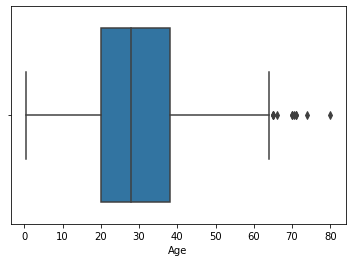

In [205]:
#Checking outliers through seaborn
sns.boxplot(train['Age'])

In [206]:
#Checking outlier
train[train['Age']>=65]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
33,34,0,2,"Wheadon, Mr. Edward H",male,66.0,0,0,C.A. 24579,10.5000,NaN,S
54,55,0,1,"Ostby, Mr. Engelhart Cornelius",male,65.0,0,1,113509,61.9792,B30,C
96,97,0,1,"Goldschmidt, Mr. George B",male,71.0,0,0,PC 17754,34.6542,A5,C
116,117,0,3,"Connors, Mr. Patrick",male,70.5,0,0,370369,7.7500,NaN,Q
280,281,0,3,"Duane, Mr. Frank",male,65.0,0,0,336439,7.7500,NaN,Q
456,457,0,1,"Millet, Mr. Francis Davis",male,65.0,0,0,13509,26.5500,E38,S
493,494,0,1,"Artagaveytia, Mr. Ramon",male,71.0,0,0,PC 17609,49.5042,NaN,C
630,631,1,1,"Barkworth, Mr. Algernon Henry Wilson",male,80.0,0,0,27042,30.0000,A23,S
672,673,0,2,"Mitchell, Mr. Henry Michael",male,70.0,0,0,C.A. 24580,10.5000,NaN,S
745,746,0,1,"Crosby, Capt. Edward Gifford",male,70.0,1,1,WE/P 5735,71.0000,B22,S


/Users/macbook/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Pclass', ylabel='count'>

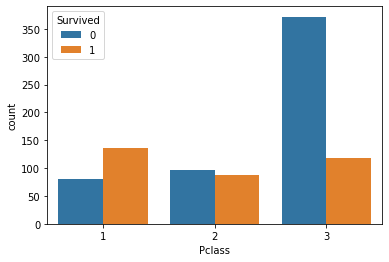

In [207]:
sns.countplot(train['Pclass'],hue=train['Survived'])

In [208]:
#Map(re-assigning values)
train['Pclass'].map({1:3,
                    2:2,
                    3:1})

0      1
1      3
2      1
3      3
4      1
      ..
886    2
887    3
888    1
889    3
890    1
Name: Pclass, Length: 891, dtype: int64

In [209]:
train['Pclass']=train['Pclass'].map({1:3,
                    2:2,
                    3:1})

/Users/macbook/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Pclass', ylabel='count'>

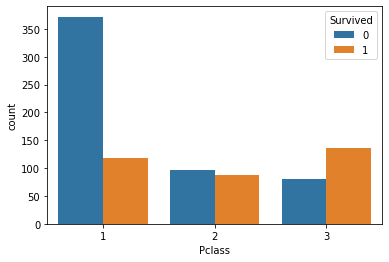

In [210]:
sns.countplot(train['Pclass'],hue=train['Survived'])

# Data preprocessing

In [211]:
#Checking for missing value
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [212]:
mean=train['Age'].mean()
train['Age'].fillna(mean,inplace=True)
mode_emb=train['Embarked'].mode()
train['Embarked'].fillna(mode_emb[0],inplace=True)
mode_cab=train['Cabin'].mode()
train['Cabin'].fillna(mode_cab[0],inplace=True)


In [213]:
mode_emb

0    S
dtype: object

In [143]:
mode_cab

0        B96 B98
1    C23 C25 C27
2             G6
dtype: object

In [214]:
train['Cabin'].fillna(mode_cab[2],inplace=True)

In [145]:
train.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

# Converting categorical to Numerical

In [215]:
train.drop(['PassengerId', 'Name','Ticket','Cabin'],axis=1,inplace=True)




In [216]:
test.drop(['PassengerId', 'Name','Ticket','Cabin'],axis=1,inplace=True)

In [222]:
missing_cols=set(x.columns).difference(set(test.columns))
missing_cols2=set(test.columns).difference(set(x.columns))
list(missing_cols.union(missing_cols2))

[]

In [223]:
def fix_missing_columns(a,b):
        missing_cols=set(a.columns).difference(set(b.columns))
        missing_cols2=set(b.columns).difference(set(a.columns))
        missing=list(missing_cols.union(missing_cols2))
        for i in missing:
            if i not in a:
                a[i]=0
            elif i not in b:
                    b[i]=0
        return a,b
        
       
       
       
       
           
              
           
              
      
              

In [224]:
x,test=fix_missing_columns(x,test)

In [147]:
y=train['Survived']
x=train.drop('Survived',axis=1)

In [149]:
x=pd.get_dummies(x,drop_first=True)

In [25]:
x

,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S
0,1,22.000000,1,0,7.2500,1,0,1
1,3,38.000000,1,0,71.2833,0,0,0
2,1,26.000000,0,0,7.9250,0,0,1
3,3,35.000000,1,0,53.1000,0,0,1
4,1,35.000000,0,0,8.0500,1,0,1
...,...,...,...,...,...,...,...,...
886,2,27.000000,0,0,13.0000,1,0,1
887,3,19.000000,0,0,30.0000,0,0,1
888,1,29.699118,1,2,23.4500,0,0,1
889,3,26.000000,0,0,30.0000,1,0,0


# Cross validation

In [150]:
from sklearn.model_selection import train_test_split

In [151]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=2021)

# Feature scaling

In [28]:
#from sklearn.preprocessing import StandardScaler

In [29]:
#sc=StandardScaler

In [30]:
#x_train=sc.fit_transform(x_train)
#x_test=sc.transform(x_test)

# Model training

In [152]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

In [153]:
rf_classifier=RandomForestClassifier(random_state=2021)

In [154]:
rf_classifier.fit(x_train,y_train)

RandomForestClassifier(random_state=2021)

In [155]:
rf_prediction=rf_classifier.predict(x_test)

In [156]:
rf_prediction

array([0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1,
       0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1,
       0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0,
       0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1,
       1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0,
       1, 0, 1, 0])

In [157]:
gb_classifier=GradientBoostingClassifier(random_state=2021)

In [158]:
gb_classifier.fit(x_train,y_train)

GradientBoostingClassifier(random_state=2021)

In [159]:
gb_prediction=gb_classifier.predict(x_test)

In [160]:
gb_prediction

array([0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1,
       1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0,
       1, 0, 1, 0])

# Model evaluation

In [161]:
from sklearn.metrics import classification_report

In [162]:
print(classification_report(y_test,rf_prediction))

              precision    recall  f1-score   support

           0       0.83      0.84      0.83       165
           1       0.74      0.73      0.73       103

    accuracy                           0.79       268
   macro avg       0.78      0.78      0.78       268
weighted avg       0.79      0.79      0.79       268



In [163]:
print(classification_report(y_test,gb_prediction))

              precision    recall  f1-score   support

           0       0.82      0.87      0.84       165
           1       0.76      0.69      0.72       103

    accuracy                           0.80       268
   macro avg       0.79      0.78      0.78       268
weighted avg       0.80      0.80      0.80       268



# Test data preprocessing

In [164]:
test['Pclass']=test['Pclass'].map({1:3,
                   2:2,
                   3:1})

In [165]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,1,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,1,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [166]:
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [169]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          418 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         418 non-null    float64
 9   Cabin        418 non-null    object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [170]:
mean=test['Age'].mean()
test['Age'].fillna(mean,inplace=True)
mean_fare=test['Fare'].mean()
test['Fare'].fillna(mean_fare,inplace=True)
mode_cab=test['Cabin'].mode()
test['Cabin'].fillna(mode_cab[0],inplace=True)

In [171]:
mean

30.272590361445815

In [172]:
mean_fare

35.6271884892086

In [173]:
mode_cab

0    B57 B59 B63 B66
dtype: object

In [174]:
test.isnull().sum()

PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [175]:
test.drop(['Name','Ticket','Cabin'],axis=1,inplace=True)


In [176]:
test=pd.get_dummies(test,drop_first=True)

In [177]:
test

,PassengerId,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S
0,892,1,34.50000,0,0,7.8292,1,1,0
1,893,1,47.00000,1,0,7.0000,0,0,1
2,894,2,62.00000,0,0,9.6875,1,1,0
3,895,1,27.00000,0,0,8.6625,1,0,1
4,896,1,22.00000,1,1,12.2875,0,0,1
...,...,...,...,...,...,...,...,...,...
413,1305,1,30.27259,0,0,8.0500,1,0,1
414,1306,3,39.00000,0,0,108.9000,0,0,0
415,1307,1,38.50000,0,0,7.2500,1,0,1
416,1308,1,30.27259,0,0,8.0500,1,0,1


In [178]:
submission=pd.DataFrame()

In [179]:
submission

""


In [180]:
submission['PassengerId']=test['PassengerId']

In [181]:
submission

,PassengerId
0,892
1,893
2,894
3,895
4,896
...,...
413,1305
414,1306
415,1307
416,1308


In [182]:
test.drop(['PassengerId'],axis=1,inplace=True)

In [183]:
x.shape

(891, 8)

In [184]:
test.shape

(418, 8)

In [185]:
test

,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S
0,1,34.50000,0,0,7.8292,1,1,0
1,1,47.00000,1,0,7.0000,0,0,1
2,2,62.00000,0,0,9.6875,1,1,0
3,1,27.00000,0,0,8.6625,1,0,1
4,1,22.00000,1,1,12.2875,0,0,1
...,...,...,...,...,...,...,...,...
413,1,30.27259,0,0,8.0500,1,0,1
414,3,39.00000,0,0,108.9000,0,0,0
415,1,38.50000,0,0,7.2500,1,0,1
416,1,30.27259,0,0,8.0500,1,0,1


In [186]:
test_prediction=rf_classifier.predict(test)

In [187]:
submission['Survived']=test_prediction

In [188]:
submission

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,1
4,896,0
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [225]:
submission.to_csv('MySubmission.csv',index=0)